In [135]:
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [136]:
column_names = ['Id', 'Topic', 'Sentiment', 'Text']
df_twitt = pd.read_csv('Data/twitter_training.csv', names=column_names)
df_twitt.drop('Id', axis = 1, inplace = True)

In [137]:
df_twitt.head()

,Topic,Sentiment,Text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [138]:
df_twitt.shape

(74682, 3)

In [139]:
df_twitt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Topic      74682 non-null  object
 1   Sentiment  74682 non-null  object
 2   Text       73996 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [140]:
df_twitt.isnull().sum()

Topic          0
Sentiment      0
Text         686
dtype: int64

In [141]:
df_twitt.dropna(inplace=True)

In [142]:
df_twitt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Topic      73996 non-null  object
 1   Sentiment  73996 non-null  object
 2   Text       73996 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [143]:
(df_twitt.Sentiment.value_counts()/len(df_twitt)*100)

Sentiment
Negative      30.215147
Positive      27.913671
Neutral       24.471593
Irrelevant    17.399589
Name: count, dtype: float64

In [144]:
df_twitt['Topic'].nunique()

32

In [145]:
# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

In [146]:
# Function to preprocess text using spaCy
def preprocess_text(text):
    # Remove punctuations and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Convert to lowercase
    text = text.lower()
    # Process text with spaCy
    doc = nlp(text)
    # Lemmatize, remove stopwords and non-alphabetic tokens
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

In [147]:
# Apply the preprocessing to the text column
df_twitt['cleaned_text'] = df_twitt['Text'].apply(preprocess_text)

In [148]:
print(df_twitt[['Text', 'cleaned_text']].head())

                                                Text              cleaned_text
0  im getting on borderlands and i will murder yo...   m get borderland murder
1  I am coming to the borders and I will kill you...          come border kill
2  im getting on borderlands and i will kill you ...     m get borderland kill
3  im coming on borderlands and i will murder you...  m come borderland murder
4  im getting on borderlands 2 and i will murder ...   m get borderland murder


In [149]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_twitt['cleaned_text'], df_twitt['Sentiment'], test_size=0.3)


In [150]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [151]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('rf', RandomForestClassifier(random_state=42))])

In [152]:
# Predict the sentiment of the test set using RandomForest
y_pred = model.predict(X_test)

In [153]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.92      0.76      0.83      3771
    Negative       0.88      0.89      0.89      6684
     Neutral       0.88      0.83      0.86      5438
    Positive       0.80      0.90      0.85      6306

    accuracy                           0.86     22199
   macro avg       0.87      0.85      0.86     22199
weighted avg       0.86      0.86      0.86     22199



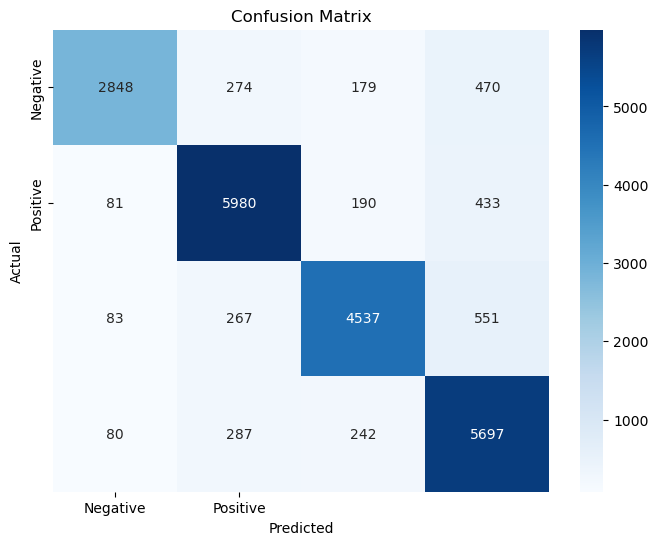

In [154]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [155]:
# Feature Importance
vectorizer = model.named_steps['tfidf']
classifier = model.named_steps['rf']
feature_names = vectorizer.get_feature_names_out()
feature_importances = classifier.feature_importances_

In [156]:
# Predict the sentiment of the test set using RandomForest
y_pred_dt = model_dt.predict(X_test)

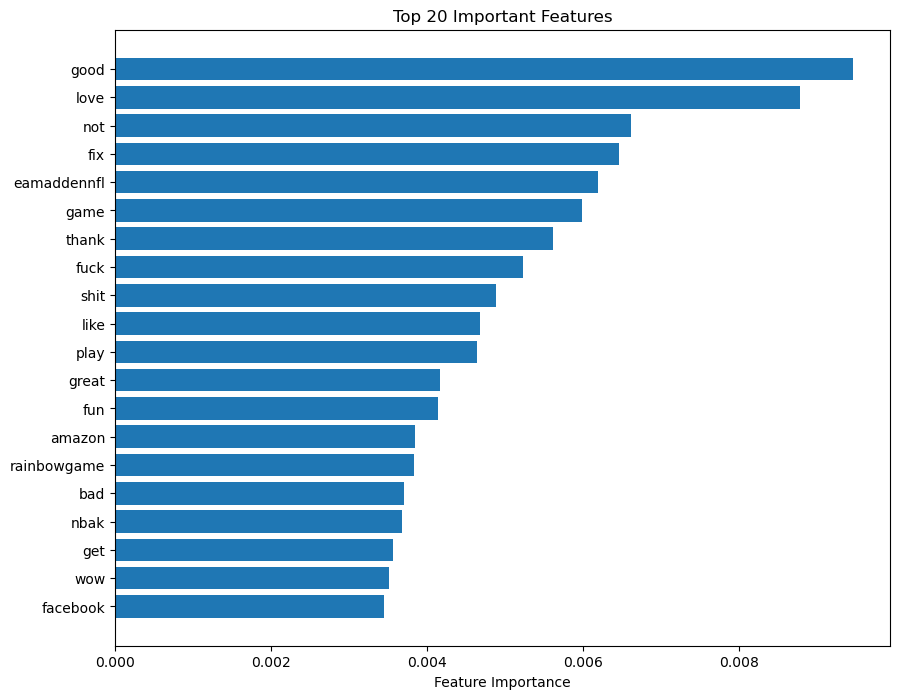

In [157]:
# Get top 20 important features
indices = np.argsort(feature_importances)[-20:]
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features')
plt.show()

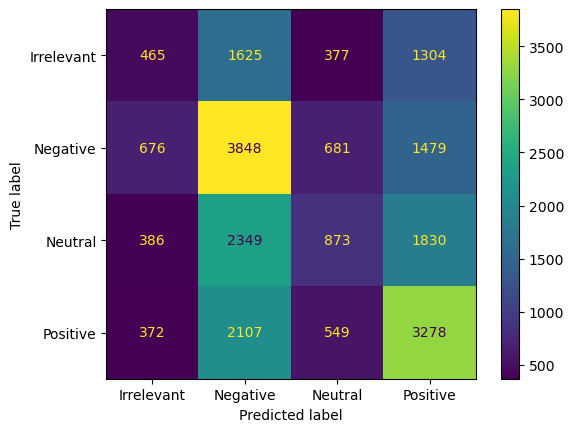

In [158]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)

In [159]:
# A function to predict sentiment
def predict_sentiment(text):
    # Preprocess the text
    preprocessed_text = preprocess_text(text)
    
    # Make predictions
    prediction = model.predict([preprocessed_text])
    return prediction

In [160]:
print('Sentiment prediction:', predict_sentiment('It was amazing'))

Sentiment prediction: ['Positive']


In [161]:
print('Sentiment prediction:', predict_sentiment('It was horrible'))

Sentiment prediction: ['Irrelevant']


In [162]:
print('Sentiment prediction:', predict_sentiment('Die you son of a something'))

Sentiment prediction: ['Neutral']


In [163]:
print('Sentiment prediction:', predict_sentiment('Borderline is one of the hardcore games that exists'))

Sentiment prediction: ['Negative']


In [164]:
print('Sentiment prediction:', predict_sentiment('It was challenging but then quite fun'))

Sentiment prediction: ['Positive']
